# An Example of Using Bayes Polynomial Test

In this notebook I will document a simple usage case of the Bayes Polynomial test. First import the necessary modules. 

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from BayesPolynomialTest import BayesPolynomialTest
import numpy as np

Now we make some fake data, we generate it from a quadratic polynomial and add some noise 

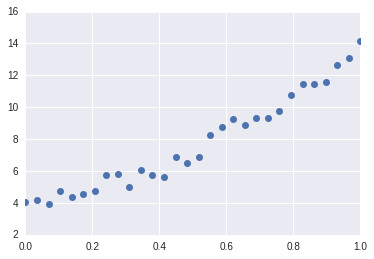

In [16]:
N = 30
b = [7, 3, 4]
x = np.linspace(0, 1, N)
y = np.poly1d(b)(x) +  np.random.normal(0, 0.5, N)

plt.plot(x, y, "o")

plt.show()

By eye it is fairly clear there is some curvature, but we want to quantify that. To do this, we pass in the data along with some other parameters to the `BayesPolynomialTest`. The important part here is the `degrees=[1, 2]` which instructs it to test polynomials of 1st and 2nd order. The other parameters control how the MCMC parameter estimation is performed and will be explained in a moment.

In [17]:
test = BayesPolynomialTest(x, y, degrees=[1, 2], ntemps=50, betamin=-6,
                           nburn0=50, nburn=50, nprod=50,
                           unif_lim=100)

This may take a while to run. Once complete we plot the diagnostic plot:

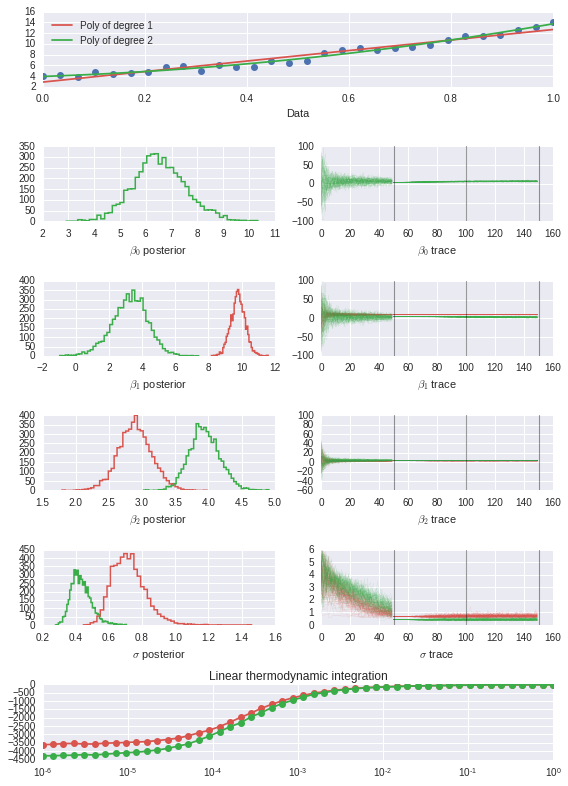

In [18]:
test.diagnostic_plot()

The diagnostic plot has several features: first is the original data along with the maximum posterior estimate based on the fit to the data from the fitted polynomials. This should immediately give you some sense of how the two fits performed. Then, we have pairs of plots showing the posterior distribution and a trace of the MCMC chains for each fitted parameter. Notice the $\beta$ are the polynomial coefficients in descending order, hence why $\beta_0$ does not have a posterior from the linear fit. In the traces, on the right-hand-side three vertical bars denote the different stages of the MCMC simulation as follows

1) The initial run: First we let the MCMC chains evolve for `nburn0`, starting with a uniform samplin from the prior

2) The burnin: second we reset all the samples to the maximum posterior from the initial run, and allow them to evolve for `nburn` steps. This removes chains which get stuck in islands of low probability in the initial step.

3) The production: last, we allow the chains to evolve for `nprod`, these samples are used in the posterior estimate (on the left-hand-side) and evidence estimation.

Finally we have the thermodynamic integration plot. This is the mean evidence at the `ntemps` fixed temperatures sampled in the production run. The evidence results from numerical integration from $-\infty$ to $10^{0}$. So here one needs to check that there is enough temperatures to get an accurate numerical integration, and that the minimum temperature is small enough since we can never actually sample at $-\infty$.

Once we are happy that we have accurately sampled the posterior. We can compute the Bayes factor:

In [20]:
test.BayesFactor()

Bayes Factor (Poly of degree 2, Poly of degree 1) = 5.30232570889 +/- 0.639631905762


So in this instance, the odds-ratio (assuming our prior didn't favour either model) is

$$ \frac{P(\textrm{ quadratic }| \textrm{ data })}{P(\textrm{ linear }| \textrm{ data })} = 10^{5.3 \pm 0.6} $$

This is significant evidence for the quadratic model and should make us very certain.